In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Import Data file from Data Wrangling Process

df = pd.read_csv('Image Values2.csv')

df.head()

,Unnamed: 0,Image Name,Image Value
0,0,A1,A
1,1,A2,A
2,2,A3,A
3,3,A4,A
4,4,A5,A


# Apply pandas.get_dummies to convert categorical data to numerical

In [24]:
from hyperopt import Trials, STATUS_OK, tpe

from hyperas.distributions import uniform
from hyperas import optim

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np

Using TensorFlow backend.


In [4]:
alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
train = df
train_image = []
for letter in alphabet:
    for i in tqdm([*range(1,3001)]):
        img = f'C:/Bootcamp/Homework/proj3-team04/asl_alphabet_train/asl_alphabet_train/{letter}/{letter}{i}.jpg'
        img = image.load_img(img,target_size=(28,28,3),color_mode = "rgb")
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
    

100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:07<00:00, 405.54it/s]


In [115]:
# Define X & y
X = np.array(train_image)
y = train['Image Value'].values

In [116]:
# def data():
#     from sklearn.model_selection import train_test_split
#     # Split into Train/Test
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)    
#     # Apply One-Hot Encoding for y-categorical variable
#     label_encoder = LabelEncoder()
#     label_encoder.fit(y_train)
#     encoded_y_train = label_encoder.transform(y_train)
#     encoded_y_test = label_encoder.transform(y_test)
#     y_train_cat = to_categorical(encoded_y_train)
#     y_test_cat = to_categorical(encoded_y_test) 
#     # Define data inputs
#     x_train = X_train
#     y_train = y_train_cat
#     x_test = X_test
#     y_test = y_test_cat
#     return x_train, x_test, y_train, y_test



In [117]:
# Convert image arrays to numpy array

#X = np.array(train_image)



In [118]:
#y=train['Image Value'].values
#y = pd.get_dummies(y)


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Exception: Data must be 1-dimensional

In [103]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


In [9]:
y_train_cat = to_categorical(encoded_y_train)
y_test_cat = to_categorical(encoded_y_test)

In [10]:
y_train.shape


(62400,)

In [11]:
X_train.shape

(62400, 28, 28, 3)

In [113]:
def create_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Conv2D(26, kernel_size=(3, 3),padding="valid",activation='relu',input_shape=(28, 28, 3)))
    model.add(Conv2D(64, (3, 3),padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Flatten())
    #model.add(Dense(64, activation='relu'))
    model.add(Dense({{choice([256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))
    #model.add(Dropout(0.5))
    model.add(Dense(26, activation='softmax'))    
    # Compile Model
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    # Fit Model
    model.fit(x_train, y_train, epochs=10,verbose=10, validation_data=(X_test, y_test_cat))
    
    return model

In [87]:
# def data():
#     x_train = X_train
#     x_test = X_test
#     y_train = y_train_cat
#     y_test = y_test_cat
#     return x_train, y_train, x_test, y_test

In [114]:
best_run = optim.minimize(model=create_model,data=data,algo=tpe.suggest,max_evals=10,trials=Trials(),notebook_name = 'Model Training - 2.0')

>>> Imports:
#coding=utf-8

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas.distributions import uniform
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from tensorflow.keras.models import Sequential
except:
    pass

try:
    from tensorflow.keras.layers import Conv2D
except:
    pass

try:
    from tensorflow.keras.layers import MaxPooling2D
except:
    pass

try:
    from tensorflow.keras.layers import Flatten
except:
    pass

try:
    from tensorflow.keras.layers import Dense
except:
    pass

try:
    from tensorflow.keras.layers import Dropout
except:
    pass

try:
    from tensorflow.keras.preprocessing import image
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical
except:
    pass

try:
    

NameError: name 'X' is not defined

In [83]:
if __name__ == '__main__':
    best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=5,
                                          trials=Trials(),
                                         notebook_name = 'Model Training - 2.0')


>>> Imports:
#coding=utf-8

try:
    import matplotlib.pyplot as plt
except:
    pass

try:
    import pandas as pd
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas.distributions import uniform
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from tensorflow.keras.models import Sequential
except:
    pass

try:
    from tensorflow.keras.layers import Conv2D
except:
    pass

try:
    from tensorflow.keras.layers import MaxPooling2D
except:
    pass

try:
    from tensorflow.keras.layers import Flatten
except:
    pass

try:
    from tensorflow.keras.layers import Dense
except:
    pass

try:
    from tensorflow.keras.layers import Dropout
except:
    pass

try:
    from tensorflow.keras.preprocessing import image
except:
    pass

try:
    from tensorflow.keras.utils import to_categorical
except:
    pass

try:
    

TypeError: object of type 'NoneType' has no len()

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 26)        728       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        15040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
Total params: 15,768
Trainable params: 15,768
Non-trainable params: 0
_________________________________________________________________


In [20]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))

Epoch 1/10


ValueError: in user code:

    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 26) and (32, 12, 12, 64) are incompatible


In [114]:
encoded_predictions = model.predict_classes(X_test[:20])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [115]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels    : {(y_test[:20])}")

Predicted classes: ['U' 'O' 'I' 'M' 'G' 'J' 'C' 'K' 'S' 'C' 'W' 'D' 'B' 'K' 'K' 'P' 'V' 'J'
 'Q' 'N']
Actual Labels    : ['U' 'O' 'I' 'M' 'G' 'J' 'C' 'K' 'S' 'C' 'V' 'D' 'B' 'K' 'K' 'P' 'V' 'J'
 'Q' 'N']


### Test on external images

In [154]:
train_image = []
for letter in alphabet:
    img = f'//LANPDC/Users/nvora/Downloads/archive/asl_alphabet_test/asl_alphabet_test/{letter}_test.jpg'
    img = image.load_img(img,target_size=(28,28,3),color_mode = "rgb")
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

In [247]:
train_image = []

img = f'//LANPDC/Users/nvora/My Documents/My Pictures/Camera Roll/Neil_A.jpg'
img = image.load_img(img,target_size=(28,28,3),color_mode = "rgb")
img = image.img_to_array(img)
img = img/255
train_image.append(img)

In [248]:
len(train_image)

1

In [249]:
X = np.array(train_image)

In [250]:
encoded_predictions = model.predict_classes(X[:26])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [251]:
print(f"Predicted classes: {prediction_labels}")

Predicted classes: ['T']


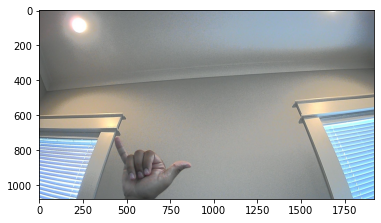

In [116]:

# image_path = 'C:/Bootcamp/Homework/proj3-team04/Neil_Y2.jpg'
# img = image.load_img(image_path)
# plt.imshow(img)

In [117]:
# def predict(image_path):
#     """Use VGG19 to label image"""
#     img = image.load_img(image_path,target_size=(28,28,3),color_mode = "rgb")
#     x = np.array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     predictions = model.predict(x)
#     plt.imshow(img)
#     print('Predicted:', decode_predictions(predictions, top=3))

In [118]:
# image_path = 'C:/Bootcamp/Homework/proj3-team04/Neil_Y2.jpg'
# predict(image_path2)

In [128]:
x_neil = np.array(img)
#x_neil = np.expand_dims(x_neil,axis=0)
#x_neil = preprocess_input(x_neil)

In [129]:
x_neil = x_neil.reshape(-1,1080,1920,3)
x_neil.shape

(1, 1080, 1920, 3)

In [130]:
pred = model.predict_classes(x_neil)
prediction = label_encoder.inverse_transform(pred)

ValueError: in user code:

    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\nvora\Anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_2 is incompatible with the layer: expected axis -1 of input shape to have value 9216 but received input with shape [None, 32985856]
